In [1]:
import os
import pydicom as dicom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eda_functions
from scipy import stats as ss
%matplotlib inline

### Image samples

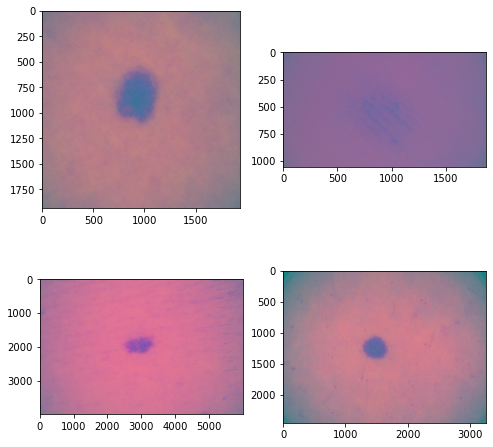

In [2]:
PATH = '../data/train/'
files = os.listdir(PATH)

np.random.seed(42)
random_four = np.random.randint(0, len(files), size=4)
subplots = [[0,0],[0,1],[1,0],[1,1]]

fig, axs = plt.subplots(2,2, figsize=(8,8))

for ax, image_number in zip(axs.ravel(), range(4)):
    sample = dicom.dcmread(PATH+files[random_four[image_number]])
    ax.imshow(sample.pixel_array, cmap='gray')

### EDA preprocessing

In [3]:
PATH = '../data/eda.csv'
df = eda_functions.eda_preprocessing(PATH)
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,target,hist_range,hist_iqr,hist_skew,hist_kurtosis,hist_mean,hist_median
0,ISIC_0696150,IP_8051701,female,65.0,upper extremity,0,213.0,117.50,0.258373,-1.177391,70.3125,70.0
1,ISIC_1747531,IP_3127942,female,30.0,lower extremity,0,247.0,128.25,0.681721,-0.760851,70.3125,52.0
2,ISIC_2553934,IP_0358698,male,50.0,lower extremity,0,139.0,20.00,1.761496,1.787213,21.9375,4.0
3,ISIC_2807429,IP_7373371,female,55.0,head/neck,0,407.0,47.00,2.139063,3.703967,50.2500,0.5
4,ISIC_3229755,IP_2738065,female,20.0,lower extremity,0,56.0,11.00,1.868254,3.405694,7.5000,3.0


In [4]:
melanoma = df[df['target'] == 1]
no_melanoma = df[df['target'] == 0]

I first examined the pixel intensity histogram data based on location. While examining the data via ANOVA modeling, the histogram presented significant differences between patients based on the location of the image on the body. ANOVAs of range, IQR, and mean all produced significant F values, suggesting that patients differentiate amongst each other. This is to be expected, as on an individual basis, patients are expected to be different.

Insignificant P-values began to appear while examining the ANOVA between the melanoma images, split by location. For example, an examination of the means of pixel intensities produced significant P-values in the head/neck, lower extremity, torseo, and upper extremity regions, but insignificant values in the palm/sole and oral/genital regions:

In [5]:
eda_functions.anova_report(df, grouping='anatom_site_general_challenge',
                          comparison='target',
                          aggregator='mean')

This suggests that we will have a much easier time diagnosing in the head/neck, lower extremity, torso, and upper extremity regions based solely on simple examination of the images with a relatively simple classifier.